## Différents imports et ouverture des datasets

In [1]:
import pandas as pd
import seaborn as sns
import os
import numpy as np

In [2]:
os.chdir('C:/Users/zitou/OneDrive/Bureau/projet_info')

In [3]:
df1 = pd.read_excel('bdd_avion_1.xlsx')

In [4]:
bdd_sncf = pd.read_csv('bdd_sncf.csv')

In [5]:
df2 = pd.read_excel('bdd_avion_2.xlsx')

In [6]:
df1

,Column1,Dépar,Arrivé,Prix,Temps entre la réservation et le vol
0,0,Paris,Strasbourg,323,0 à 1 mois
1,1,Paris,Strasbourg,240,1 à 2 mois
2,2,Paris,Strasbourg,199,2 à 3 mois
3,3,Paris,Strasbourg,201,3 à 4 mois
4,4,Paris,Strasbourg,209,4 à 5 mois
...,...,...,...,...,...
1618,1618,Nice,Paris,119,7 à 8 mois
1619,1619,Nice,Paris,124,8 à 9 mois
1620,1620,Nice,Paris,149,9 à 10 mois
1621,1621,Nice,Paris,127,10 à 11 mois


In [7]:
df2

,Column1,Départ,Arrivée,Prix,Mois
0,0,Paris,Strasbourg,319,jan
1,1,Paris,Strasbourg,189,fév
2,2,Paris,Strasbourg,225,mar
3,3,Paris,Strasbourg,238,avr
4,4,Paris,Strasbourg,256,mai
...,...,...,...,...,...
1943,1943,Nice,Paris,150,août
1944,1944,Nice,Paris,124,sep
1945,1945,Nice,Paris,124,oct
1946,1946,Nice,Paris,119,nov


In [8]:
df1 = df1.drop(['Column1'], axis = 1)

In [9]:
df1.columns = ['Départ', 'Arrivée', 'Prix', 'Temps']

In [10]:
bdd_sncf.dtypes.value_counts(), df1.dtypes.value_counts()

(float64    4
 object     2
 dtype: int64,
 object    3
 int64     1
 dtype: int64)

In [11]:
df1.Temps = df1.Temps.apply(lambda x: [int(s) for s in x.split(' ') if s.isdigit()][1])

$\to$ On transforme le temps jusqu'à l'achat du billett en entier représentant le nombre de mois avant le départ. Celà permettra d'éviter un encodage catégoriel de cette variable qui peut être vue comme une variable discrète.

**Ensuite :** On reprend l'étape de fusion des bases de données. Dans notre modélisation, on va conserver plus de variables. On a en effet vu dans la partie statistiques descriptives que des variables comme le prix des billets d'avion et le prix moyen des billets de train, ou encore le temps avant le départ et le prix du billet d'avion. **On va donc conserver ces variables**

In [12]:
bdd_sncf['Gare de départ'].loc[(bdd_sncf['Gare de départ'] == 'PARIS MONTPARNASSE 1 ET 2') | (bdd_sncf['Gare de départ'] == 'PARIS AUSTERLITZ') | (bdd_sncf['Gare de départ'] == 'MASSY TGV') | (bdd_sncf['Gare de départ'] == 'MARNE LA VALLEE CHESSY') | (bdd_sncf['Gare de départ'] == 'PARIS NORD') | (bdd_sncf['Gare de départ'] == 'PARIS GARE DE LYON') |(bdd_sncf['Gare de départ'] == 'AEROPORT CDG 2 TGV ROISSY') | (bdd_sncf['Gare de départ'] =='MANTES LA J. TGV')] = 'Paris'
bdd_sncf['Gare d arrivée'].loc[(bdd_sncf['Gare d arrivée'] == 'PARIS MONTPARNASSE 1 ET 2') | (bdd_sncf['Gare d arrivée'] == 'PARIS AUSTERLITZ') | (bdd_sncf['Gare d arrivée'] == 'MASSY TGV') | (bdd_sncf['Gare d arrivée'] == 'MARNE LA VALLEE CHESSY') | (bdd_sncf['Gare d arrivée'] == 'PARIS NORD') | (bdd_sncf['Gare d arrivée'] == 'PARIS GARE DE LYON') |(bdd_sncf['Gare d arrivée'] == 'AEROPORT CDG 2 TGV ROISSY') | (bdd_sncf['Gare d arrivée'] =='MANTES LA J. TGV') ] = 'Paris'

bdd_sncf['Gare de départ'].loc[bdd_sncf['Gare de départ'] == 'NANTES'] = 'Nantes'
bdd_sncf['Gare d arrivée'].loc[bdd_sncf['Gare d arrivée'] == 'NANTES'] = 'Nantes'


bdd_sncf['Gare de départ'].loc[bdd_sncf['Gare de départ'] == 'MARSEILLE ST CHARLES'] = 'Marseille'
bdd_sncf['Gare d arrivée'].loc[bdd_sncf['Gare d arrivée'] == 'MARSEILLE ST CHARLES'] = 'Marseille'

bdd_sncf['Gare de départ'].loc[bdd_sncf['Gare de départ'] == 'BORDEAUX ST JEAN'] = 'Bordeaux'
bdd_sncf['Gare d arrivée'].loc[bdd_sncf['Gare d arrivée'] == 'BORDEAUX ST JEAN'] = 'Bordeaux'


bdd_sncf['Gare de départ'].loc[(bdd_sncf['Gare de départ'] == 'LYON PART DIEU') | (bdd_sncf['Gare de départ'] == 'LYON ST EXUPERY') | (bdd_sncf['Gare de départ'] == 'LYON PERRACHE')] = 'Lyon'
bdd_sncf['Gare d arrivée'].loc[(bdd_sncf['Gare d arrivée'] == 'LYON PART DIEU') | (bdd_sncf['Gare d arrivée'] == 'LYON ST EXUPERY') | (bdd_sncf['Gare d arrivée'] == 'LYON PERRACHE')] = 'Lyon'

bdd_sncf['Gare de départ'].loc[bdd_sncf['Gare de départ'] == 'TOULOUSE MATABIAU'] = 'Toulouse'
bdd_sncf['Gare d arrivée'].loc[bdd_sncf['Gare d arrivée'] == 'TOULOUSE MATABIAU'] = 'Toulouse'

bdd_sncf['Gare de départ'].loc[bdd_sncf['Gare de départ'] == 'NICE VILLE' ] = 'Nice'
bdd_sncf['Gare d arrivée'].loc[bdd_sncf['Gare d arrivée'] == 'NICE VILLE' ] = 'Nice'

bdd_sncf['Gare de départ'].loc[bdd_sncf['Gare de départ'] == 'STRASBOURG'] = 'Strasbourg'
bdd_sncf['Gare d arrivée'].loc[bdd_sncf['Gare d arrivée'] == 'STRASBOURG'] = 'Strasbourg'

bdd_sncf['Gare de départ'].loc[bdd_sncf['Gare de départ'] == 'BREST' ] = 'Brest'
bdd_sncf['Gare d arrivée'].loc[bdd_sncf['Gare d arrivée'] == 'BREST' ] = 'Brest'

bdd_sncf['Gare de départ'].loc[bdd_sncf['Gare de départ'] == 'MONTPELLIER' ] = 'Montpellier'
bdd_sncf['Gare d arrivée'].loc[bdd_sncf['Gare d arrivée'] == 'MONTPELLIER' ] = 'Montpellier'

bdd_sncf['Gare de départ'].loc[bdd_sncf['Gare de départ'] == 'LIMOGES BENEDICTINS'] = 'Limoges'
bdd_sncf['Gare d arrivée'].loc[bdd_sncf['Gare d arrivée'] == 'LIMOGES BENEDICTINS'] = 'Limoges'

bdd_sncf['Gare de départ'].loc[bdd_sncf['Gare de départ'] == 'METZ VILLE'] = 'Metz'
bdd_sncf['Gare d arrivée'].loc[bdd_sncf['Gare d arrivée'] == 'METZ VILLE'] = 'Metz'

bdd_sncf['Gare de départ'].loc[(bdd_sncf['Gare de départ'] == 'LILLE FLANDRES') | (bdd_sncf['Gare de départ'] == 'LILLE EUROPE') ] = 'Lille'
bdd_sncf['Gare d arrivée'].loc[(bdd_sncf['Gare d arrivée'] == 'LILLE FLANDRES') | (bdd_sncf['Gare d arrivée'] == 'LILLE EUROPE') ] = 'Lille'

bdd_sncf['Gare de départ'].loc[bdd_sncf['Gare de départ'] == 'CAEN' ] = 'Caen'
bdd_sncf['Gare d arrivée'].loc[bdd_sncf['Gare d arrivée'] == 'CAEN' ] = 'Caen'

bdd_sncf['Gare de départ'].loc[bdd_sncf['Gare de départ'] ==  ' POITIERS'] = 'Poitiers'
bdd_sncf['Gare d arrivée'].loc[bdd_sncf['Gare d arrivée'] ==  ' POITIERS'] = 'Poitiers'

bdd_sncf['Gare de départ'].loc[bdd_sncf['Gare de départ'] ==  'RENNES'] = 'Rennes'
bdd_sncf['Gare d arrivée'].loc[bdd_sncf['Gare d arrivée'] ==  'RENNES'] = 'Rennes'

liste_villes = ['Strasbourg', 'Bordeaux', 'Clermont-Ferrand', 'Rennes', 'Brest',
       'Ajaccio', 'Bastia', 'Calvi', 'Figari', 'Montpellier', 'Limoges',
       'Metz', 'Toulouse', 'Lille', 'Caen', 'Nantes', 'Poitiers',
       'Marseille', 'Nice', 'Lyon', 'Paris','Bordeaux'] ##contient tous les destinations et villes de départ de bdd_1

indexlist=[]
for villedep in liste_villes:
    for villearr in liste_villes:
        inter = bdd_sncf[(bdd_sncf['Gare de départ'] == villedep)]
        listelement = inter[inter['Gare d arrivée']==villearr].index.values.astype(int)
        if listelement.size!=0:
            indexlist.append(listelement[0])  ## listelement stocke tous les indices des lignes de bdd_sncf dont les départs 
            #et arrivées sont dans bdd_1. 

bdd_sncf = bdd_sncf[bdd_sncf.index.isin(indexlist)]
bdd_sncf

C:\Users\zitou\anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


,Gare de départ,Gare d arrivée,Prix d appel seconde,Plein tarif loisir seconde,Tarif premiere classe,Distance du trajet
7,Limoges,Paris,25.0,88.0,111.0,418.951774
85,Paris,Lyon,25.0,97.0,133.0,382.703675
86,Metz,Lyon,20.0,88.0,112.0,384.902365
103,Brest,Paris,20.0,92.0,131.0,505.076392
207,Paris,Montpellier,25.0,114.0,160.0,503.523601
...,...,...,...,...,...,...
3454,Nantes,Paris,20.0,85.0,122.0,336.159718
3754,Marseille,Rennes,30.0,142.0,180.0,773.008188
3871,Strasbourg,Marseille,20.0,124.0,161.0,616.720319
4120,Strasbourg,Lille,25.0,132.0,152.0,410.073399


In [13]:
bdd_corr = pd.merge(df1, bdd_sncf, left_on = [df1['Départ'],df1['Arrivée']], right_on = [bdd_sncf['Gare de départ'], bdd_sncf['Gare d arrivée']], how = 'inner')
bdd_corr = bdd_corr.drop(['Prix d appel seconde', 'key_0', 'key_1'], axis=1)
bdd_corr['Prix moyen'] =(bdd_corr['Plein tarif loisir seconde'] + bdd_corr['Tarif premiere classe'])
bdd_corr_1 =  bdd_corr.drop(['Plein tarif loisir seconde', 'Tarif premiere classe', 'Départ', 'Arrivée'], axis = 1)
bdd_corr_1.head(5)

,Prix,Temps,Gare de départ,Gare d arrivée,Distance du trajet,Prix moyen
0,163,1,Paris,Rennes,329.462708,193.0
1,133,2,Paris,Rennes,329.462708,193.0
2,144,3,Paris,Rennes,329.462708,193.0
3,139,4,Paris,Rennes,329.462708,193.0
4,151,5,Paris,Rennes,329.462708,193.0


In [14]:
df2 = df2.drop('Column1', axis = 1)

In [15]:
bdd_corr2 = pd.merge(df2, bdd_sncf, left_on = [df2['Départ'],df2['Arrivée']], right_on = [bdd_sncf['Gare de départ'], bdd_sncf['Gare d arrivée']], how = 'inner')
bdd_corr2 = bdd_corr2.drop(['Prix d appel seconde', 'key_0', 'key_1'], axis=1)
bdd_corr2['Prix moyen'] =(bdd_corr2['Plein tarif loisir seconde'] + bdd_corr2['Tarif premiere classe'])
bdd_corr_21 =  bdd_corr2.drop(['Plein tarif loisir seconde', 'Tarif premiere classe', 'Départ', 'Arrivée'], axis = 1)
bdd_corr_21.head(5)

,Prix,Mois,Gare de départ,Gare d arrivée,Distance du trajet,Prix moyen
0,129,jan,Paris,Rennes,329.462708,193.0
1,141,fév,Paris,Rennes,329.462708,193.0
2,294,mar,Paris,Rennes,329.462708,193.0
3,134,avr,Paris,Rennes,329.462708,193.0
4,125,mai,Paris,Rennes,329.462708,193.0


In [16]:
bdd_corr2 = bdd_corr2.drop(['Gare de départ'], axis = 1)

In [17]:
bdd_corr2.shape

(355, 9)

In [18]:
bdd_corr_1.shape

(329, 6)

$\to$ Les données avec lesquelles on va travailler sont beaucoup moins nombreuses

**On affiche ci dessous les colonnes de chaque dataset, pour comprendre ce qu'il représente**

In [19]:
bdd_corr_1.columns, bdd_corr2.columns

(Index(['Prix', 'Temps', 'Gare de départ', 'Gare d arrivée',
        'Distance du trajet', 'Prix moyen'],
       dtype='object'),
 Index(['Départ', 'Arrivée', 'Prix', 'Mois', 'Gare d arrivée',
        'Plein tarif loisir seconde', 'Tarif premiere classe',
        'Distance du trajet', 'Prix moyen'],
       dtype='object'))

$\to$ Gare de départ / départ et gare d'arrivée /arrivée sont les mêmes variables.

$\to$ La colonne qui change entre les deux datasets est la colonne 'Temps' qui représente le délais entre l'achat du billet et le départ, et la colonne 'Mois', qui représente le mois du vol. Si on voulait fusionner les deux datasets, on perdrait énormément d'information (de lignes). En effet, les données doivent être fusionnées sur le départ, l'arrivée, et une variable de prix, pour s"assurer qu'il s'agit bien du même trajet. Ce problème vient du fait que le prix dépend de la variable Temps, et de la vraible Mois. On a des bases séparées, donc on a pas forcément des dépendances simultanées. On perdrait donc beaucoup de lignes, ce qui ne nous arrange pas pour le modèle.

In [20]:
df = bdd_corr_1.copy()
df_bis = bdd_corr_21.copy()

In [21]:
df.dtypes.value_counts()

object     2
float64    2
int64      2
dtype: int64

## Analyse par variables

On va beaucoup d'intéresser aux variables catégorielles, puisque nous allons devoir les encoder

<AxesSubplot:ylabel='Gare de départ'>

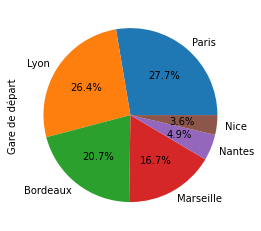

In [22]:
df['Gare de départ'].value_counts().plot.pie(autopct='%1.1f%%')

On constate que le nombre de trajets qui partent de certaines gares est plus élevé que pour d'autres gares. A priori, on ne peut pas dire si celà a une incidence sur le prix du billet d'avion. Il est à noter ici que 'Gare de départ' représente plus la ville de départ qu'une gare. C'est donc le cas aussi pour les trajets d'avion. 

<AxesSubplot:ylabel='Gare d arrivée'>

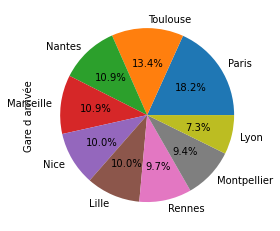

In [23]:
df['Gare d arrivée'].value_counts().plot.pie(autopct='%1.1f%%')

Les gare d'arrivées recoivent elles plus ou moins le même nombre de trajets.

<AxesSubplot:ylabel='Mois'>

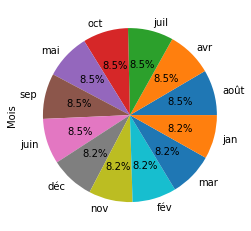

In [24]:
df_bis['Mois'].value_counts().plot.pie(autopct = '%1.1f%%')

$\to$ Pour le deuxième dataset, on constate que le nombre de vol par mois semble être le même. On ne met donc pas en évidence ici des mois avec plus de demande, donc potentiellement un prix plus élevé. C'est simplement notre échantillon qui est équiréparti entre les mois. Il sera tout de même interessant de s'intéresser au prix par mois.

# Preprocessing


On va utiliser un encodage OneHot pour les colonnes avec des types objets, et un RobustScaler pour faire face aux valeurs aberrantes que l'on a pu constater. On réfléchira ensuite à la pertinence de l'imputation de ces valeurs au datasets. On pourra également réfléchir à la métrique utilisée pour parvenir à nos fins.

**Justification du OneHotEncoding**: ici, on fait face à un grand nombre de possibilité d'issue pour les variables que l'on encode, qui seront 'Gare de départ' et 'Gare d arrivée'. De plus, il n'existe pas de relation séquentielle entre celles-ci. De plus, si on encodait les noms des gares par [1,2,3,4,5] par exemple, on aurait le 1 et le 2 très proches dans l'encodage, mais pour autant pas proche du tout dans la réalité, si par exemple celà correspond à Paris et Strasbourg, par la géographie d'une part, mais aussi de prix, de nombre de départs, etc. Un encodage OneHot, qui attribue un vecteur comprenant une unité 1 à la coordonnée i pour coder l'issue i de la variable, donne une vraie distance entre les gares.

**Justification du RobustScaler :** Ici, on applique la formule $ \dfrac{\text{valeur} - \text{médiane}}{\text{inter-quartile}} $. La médiane est moins sensible que la moyenne aux outliers, là où dans certains normalisateurs, on a la moyenne. On a donc une première approche ici de prise en compte des valeurs aberrantes. On peut s'en convaincre sur le graphe suivant.

### Premier dataset :
(Contient la variable $\textit{Temps}$)

In [25]:
dfm = df.copy()
dfm.Prix = dfm.Prix.astype('float')
dfm.Temps = dfm.Temps.astype('float')
#On passe le prix et le temps en flottants pour pouvoir les passer dans le scaler.

In [26]:
from sklearn.preprocessing import OneHotEncoder, RobustScaler

ohe = OneHotEncoder(sparse = False) #On demande un array et une sparse matrix pour ne pas avoir de problèmes avec les autres
                                    #fonctions de scikit-learn.
rob = RobustScaler()

In [27]:
# Normalisation des variables flottantes

for flo in dfm.select_dtypes('float'):
    dfm[flo] = rob.fit_transform(np.array(dfm[flo]).reshape(-1,1))

In [28]:
dfm

,Prix,Temps,Gare de départ,Gare d arrivée,Distance du trajet,Prix moyen
0,0.171875,-0.833333,Paris,Rennes,-0.407151,-0.456790
1,-0.296875,-0.666667,Paris,Rennes,-0.407151,-0.456790
2,-0.125000,-0.500000,Paris,Rennes,-0.407151,-0.456790
3,-0.203125,-0.333333,Paris,Rennes,-0.407151,-0.456790
4,-0.015625,-0.166667,Paris,Rennes,-0.407151,-0.456790
...,...,...,...,...,...,...
324,-0.515625,0.333333,Nice,Paris,0.974664,1.074074
325,-0.437500,0.500000,Nice,Paris,0.974664,1.074074
326,-0.046875,0.666667,Nice,Paris,0.974664,1.074074
327,-0.390625,0.833333,Nice,Paris,0.974664,1.074074


In [29]:
# Encodage des valeurs catégorielles


arr = ohe.fit_transform(np.array(dfm['Gare de départ']).reshape(-1,1))
names = ohe.categories_
names = [x + '_d'for x in names[0]] #on identifie les variables des villes avec un _départ pour les départs
arr2 = pd.DataFrame(arr, columns = names)
temp = dfm.drop('Gare de départ', axis = 1)
dfm = pd.concat([temp, arr2], axis = 1)


arr = ohe.fit_transform(np.array(dfm['Gare d arrivée']).reshape(-1,1))
names = ohe.categories_
names = [x + '_a'for x in names[0]]  #on identifie les variables des villes avec un _arrivée pour les départs
arr2 = pd.DataFrame(arr, columns = names)
temp = dfm.drop('Gare d arrivée', axis = 1)
dfm = pd.concat([temp, arr2], axis = 1)

In [30]:
dfm.columns, df['Gare de départ'].unique(), df['Gare d arrivée'].unique()
#On peut vérifier que l'encodage s'est bien fait

(Index(['Prix', 'Temps', 'Distance du trajet', 'Prix moyen', 'Bordeaux_d',
        'Lyon_d', 'Marseille_d', 'Nantes_d', 'Nice_d', 'Paris_d', 'Lille_a',
        'Lyon_a', 'Marseille_a', 'Montpellier_a', 'Nantes_a', 'Nice_a',
        'Paris_a', 'Rennes_a', 'Toulouse_a'],
       dtype='object'),
 array(['Paris', 'Nantes', 'Marseille', 'Lyon', 'Bordeaux', 'Nice'],
       dtype=object),
 array(['Rennes', 'Montpellier', 'Toulouse', 'Lille', 'Nantes',
        'Marseille', 'Nice', 'Lyon', 'Paris'], dtype=object))

In [31]:
dfm
#On a désormais un dataset plus grand avec toutes nos valeurs encodées

,Prix,Temps,Distance du trajet,Prix moyen,Bordeaux_d,Lyon_d,Marseille_d,Nantes_d,Nice_d,Paris_d,Lille_a,Lyon_a,Marseille_a,Montpellier_a,Nantes_a,Nice_a,Paris_a,Rennes_a,Toulouse_a
0,0.171875,-0.833333,-0.407151,-0.456790,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,-0.296875,-0.666667,-0.407151,-0.456790,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,-0.125000,-0.500000,-0.407151,-0.456790,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,-0.203125,-0.333333,-0.407151,-0.456790,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,-0.015625,-0.166667,-0.407151,-0.456790,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
324,-0.515625,0.333333,0.974664,1.074074,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
325,-0.437500,0.500000,0.974664,1.074074,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
326,-0.046875,0.666667,0.974664,1.074074,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
327,-0.390625,0.833333,0.974664,1.074074,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [32]:
#Séparation jeu d'entrainement, jeu de test

from sklearn.model_selection import train_test_split

train_df, test_df = train_test_split(dfm, test_size = 0.2, random_state = 0)

In [33]:
X_train = train_df.drop('Prix', axis = 1) #ce sur quoi le modèle apprend
Y_train = train_df['Prix'] #L'objectif, la variable à prédire

X_test = test_df.drop('Prix', axis = 1)
Y_test = test_df['Prix']

#### Méthode d'évaluation des modèles
Dans cette petite partie, on vé définir une fonction d'évaluation de nos modèles. On pourra ensuite discuter des métriques utilisées, et de leur pertinence.

In [39]:
import matplotlib.pyplot as plt
from sklearn.metrics import explained_variance_score, r2_score
from sklearn.model_selection import learning_curve

def evaluation(model, scor):
    model.fit(X_train, Y_train)
    y_pred = model.predict(X_test)
    
    print('explained variance : ', explained_variance_score(Y_test, y_pred))
    print('R2 :',r2_score(Y_test, y_pred))
    
    N, train_score, val_score = learning_curve(model, X_train, Y_train, cv = 4, scoring = scor, train_sizes = np.linspace(0.1,1,10))
    plt.figure(figsize = (12,8))
    plt.plot(N, train_score.mean(axis = 1), label = 'train score')
    plt.plot(N, val_score.mean(axis = 1), label = 'validation score')
    plt.legend()
    plt.show()
    
'''
Ici, on trace l'erreur sur jeu d'entrainement et l'erreur sur le jeu de test en fonction de la 
taille du jeu d'entrainement. Celà permet d'observer le comportement du modèle face aux données.
On ne souhaite pas qu'il s'adapte trop au jeu d'entrainement, et qu'il "généralise" à toutes les données.
'''

'\nIci, on trace l\'erreur sur jeu d\'entrainement et l\'erreur sur le jeu de test en fonction de la \ntaille du jeu d\'entrainement. Celà permet d\'observer le comportement du modèle face aux données.\nOn ne souhaite pas qu\'il s\'adapte trop au jeu d\'entrainement, et qu\'il "généralise" à toutes les données.\n'

#### Premier modèle, approche naïve : Comparaison de deux méthodes de régression
On va dans un premier temps s'intéresser à l'implémentation d'un modèle de Regression linéaire, contre une SVR, de manière assez naïve. On s'intéresse en effet ici à la prévision d'un prix, c'est donc à une régression, approche simple, que l'on pense en premier lieu.

In [40]:
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR

In [41]:
#On instance les modèles
svr = SVR()
reglin = LinearRegression()

In [42]:
# On place les modèles dans un dictionnaire pour pouvoir les comparer plus facilement.

dict_regression = {'Regression linéaire:' : reglin,
                   'SVM:' : svr}

Regression linéaire:
explained variance :  0.10486571449145243
R2 : 0.0848928068847492


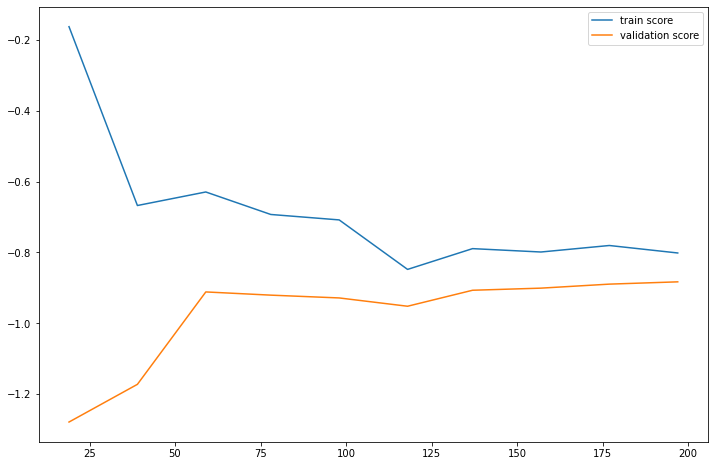

SVM:
explained variance :  0.3947375116256817
R2 : 0.36777781863996273


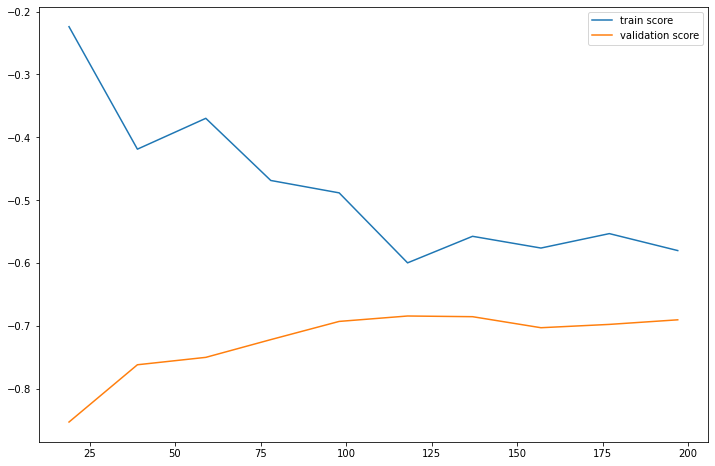

In [43]:
for name, model in dict_regression.items():
    print(name)
    evaluation(model, 'neg_mean_absolute_error')
    

**Comparaison des deux modèles :** On constate que les valeurs du $R^2$ et de la part de la variance expliquée sont très faibles dans le modèle reglin, en comparaison avec le modèle svr. Ceci étant dit, les courbes des jeux d'entrainement et des jeux de test dans les deux cas convergent vers la même valeur à peu de choses près. Le score étant le même pour le train set et le validation set, on constate que les modèles ne sont pas en overfitting (on apprend pas 'trop bien' sur le jeu d'entrainement. On peut le voir car plus on augmente la taille du jeu d'entrainement, plus l'erreur augmente dans les négatifs).

**Choix de la méthode de scoring** : On choisit ici une negative mean absolute error, donnée par $MAE = \dfrac{1}{n}\sum_{i=1}^n{\left|y_{\textit{pred}} - y_{\textit{test}}\right|}$. Sklearn cherche à toujours à maximiser, c'est pourquoi la métrique de scoring est négative ici, et **on cherche à se rapprocher de 0 par les négatifs pour minimiser l'erreur**. C'est une métrique pour laquelle l'importance d'une erreur est linéaire avec son amplitude. Dans notre cas, ce choix est judicieux : les prix des billets d'avions très chers correspondent très probablement à des trajets qui n'existent pas en direct en avion , car trop proches, et en conséquence, correspondent à des prix qvec correspondance. Le site sur lequel les données ont été scrappées propose des trajets et non des billets unique. Il est donc cohérent d'attribuer les erreurs aux valeurs aberrantes. Celà permet de ne pas inclure dans les valeurs aberrantes la partie chère des billets qui sont eux des trajets directs. Pour s'en convaincre, on va utiliser d'autres métriques.

***mean_squared_error :*** $MSE = \dfrac{1}{n}\sum_{i=1}^n{\left(y_{\textit{pred}} - y_{\textit{test}}\right)^2}$

Regression linéaire:
explained variance :  0.10486571449145243
R2 : 0.0848928068847492


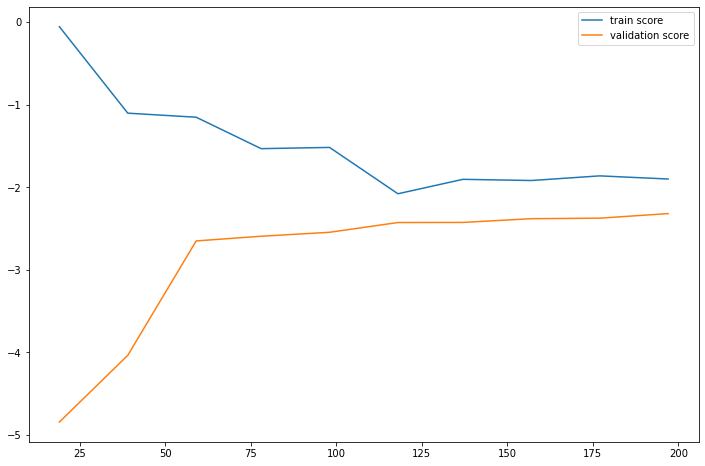

SVM:
explained variance :  0.3947375116256817
R2 : 0.36777781863996273


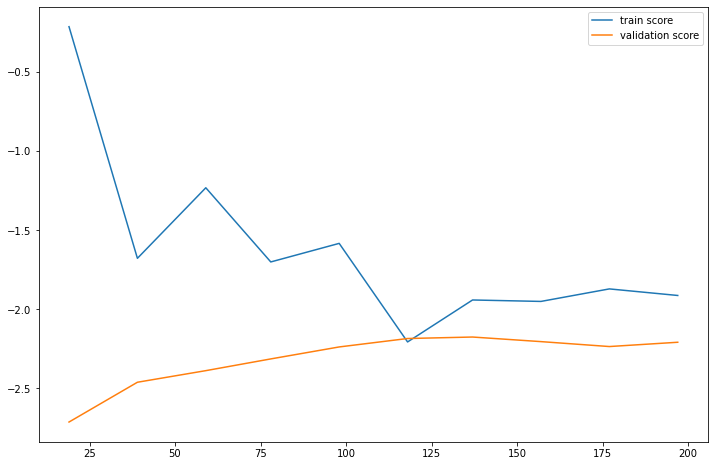

In [44]:
for name, model in dict_regression.items():
    print(name)
    evaluation(model, 'neg_mean_squared_error')

$\to$ Toujours pas d'overfitting majeur constaté. Cependant, le scoring est bien moins élevé que pour la MAE.

***Median absolute error :*** $\textit{mediane}\left(\left|y_{\textit{pred}} - y_{\textit{test}}\right|\right)$

Regression linéaire:
explained variance :  0.10486571449145243
R2 : 0.0848928068847492


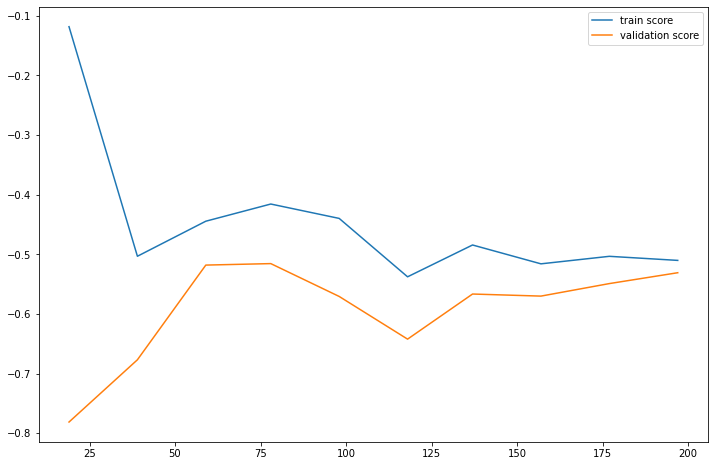

SVM:
explained variance :  0.3947375116256817
R2 : 0.36777781863996273


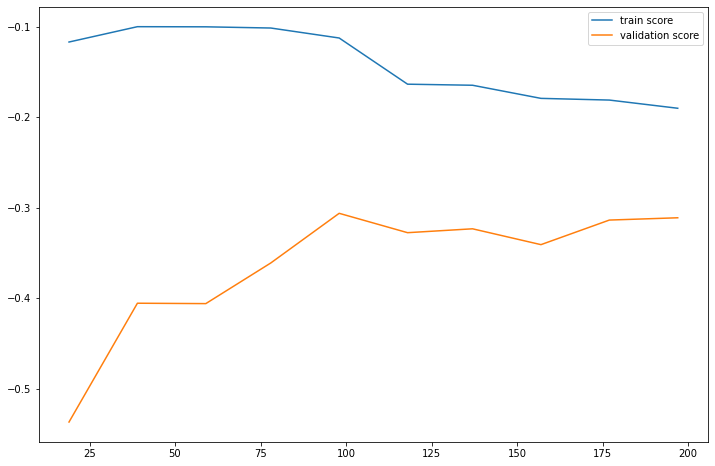

In [45]:
for name, model in dict_regression.items():
    print(name)
    evaluation(model, 'neg_median_absolute_error')

$\to$ La median absolute error est elle aussi l'une des plus efficace. Comme la MAE, elle est très peu sensible aux grandes erreurs, puisque la médiane est très peu sensible aux grandes erreur.

On va maintenant tenter d'optimiser le modèle SVR, qui eest le plus fructueux au sens du $R^2$, c'est à dire celui qui explique un plus grande partie du dataset. On va conserver les métrique MAE et median_absolute_error.

Dans la suite, on va s'interesser aux hyperparamètres du modèle.

In [46]:
#On affiche la liste des hyperparamètres disponibles dans le modèle.
svr.get_params()

{'C': 1.0,
 'cache_size': 200,
 'coef0': 0.0,
 'degree': 3,
 'epsilon': 0.1,
 'gamma': 'scale',
 'kernel': 'rbf',
 'max_iter': -1,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

**MAE**

In [47]:
from sklearn.model_selection import GridSearchCV

params = {'kernel': ['rbf', 'poly', 'sigmoid', 'linear'],
          'gamma':['scale', 'auto'],
          'C': np.linspace(0.1,2,20)}
grid = GridSearchCV(svr, params, cv = 4, scoring = 'neg_mean_absolute_error')
grid.fit(X_train, Y_train)
grid.best_params_

{'C': 2.0, 'gamma': 'auto', 'kernel': 'rbf'}

In [48]:
grid.best_score_

-0.6829046872699307

**Median absolute error**

In [49]:
grid = GridSearchCV(svr, params, cv = 4, scoring = 'neg_median_absolute_error')
grid.fit(X_train, Y_train)
grid.best_params_

{'C': 1.9, 'gamma': 'auto', 'kernel': 'rbf'}

In [50]:
grid.best_score_

-0.29396679250001184

$\to$ Si la recherche de paramètre a été presque la même dans les deux cas, on constate tout de même que l'erreur médiane est plus proche de 0, donc a de meilleures performances.

**Conclusion sur cette première approche de régression :** On a une erreur qui est minimisée à 0,3. Ce n'est pas une valeur très proche de 0. Cependant, compte tenu du peu de données qu'on avait à disposition, on peut considérer que cette performance est satisfaisante. Prédire une variable aussi précise qu'un prix induit forcément de plus grandes erreurs si la base de données est petite.


Voyons maintenant le modèle de svr avec la base de donnée incluant les mois des départs et non le temps jusqu'au départ

### Deuxième dataset : 
(Contient la variable $\textit{Mois}$)

In [51]:
dfm_bis = df_bis.copy()
dfm_bis.Prix = dfm_bis.Prix.astype('float')
#Même traitement que la première fois

In [52]:
dfm_bis

,Prix,Mois,Gare de départ,Gare d arrivée,Distance du trajet,Prix moyen
0,129.0,jan,Paris,Rennes,329.462708,193.0
1,141.0,fév,Paris,Rennes,329.462708,193.0
2,294.0,mar,Paris,Rennes,329.462708,193.0
3,134.0,avr,Paris,Rennes,329.462708,193.0
4,125.0,mai,Paris,Rennes,329.462708,193.0
...,...,...,...,...,...,...
350,150.0,août,Nice,Paris,689.267534,317.0
351,124.0,sep,Nice,Paris,689.267534,317.0
352,124.0,oct,Nice,Paris,689.267534,317.0
353,119.0,nov,Nice,Paris,689.267534,317.0


Premier constat : une base un peu plus grande.

In [53]:
from sklearn.preprocessing import RobustScaler, OneHotEncoder

ohe = OneHotEncoder(sparse = False)
rob = RobustScaler()

In [54]:
# Normalisation des variables flottantes
for flo in dfm_bis.select_dtypes('float'):
    dfm_bis[flo] = rob.fit_transform(np.array(dfm_bis[flo]).reshape(-1,1))

In [55]:
dfm_bis

,Prix,Mois,Gare de départ,Gare d arrivée,Distance du trajet,Prix moyen
0,-0.411215,jan,Paris,Rennes,-0.401107,-0.385417
1,-0.186916,fév,Paris,Rennes,-0.401107,-0.385417
2,2.672897,mar,Paris,Rennes,-0.401107,-0.385417
3,-0.317757,avr,Paris,Rennes,-0.401107,-0.385417
4,-0.485981,mai,Paris,Rennes,-0.401107,-0.385417
...,...,...,...,...,...,...
350,-0.018692,août,Nice,Paris,0.960195,0.906250
351,-0.504673,sep,Nice,Paris,0.960195,0.906250
352,-0.504673,oct,Nice,Paris,0.960195,0.906250
353,-0.598131,nov,Nice,Paris,0.960195,0.906250


In [56]:
#Encodage des valeurs catégorielles


arr = ohe.fit_transform(np.array(dfm_bis['Gare de départ']).reshape(-1,1))
names = ohe.categories_
names = [x + '_d'for x in names[0]] #on identifie les variables des villes avec un _départ pour les départs
arr2 = pd.DataFrame(arr, columns = names)
temp = dfm_bis.drop('Gare de départ', axis = 1)
dfm_bis = pd.concat([temp, arr2], axis = 1)


arr = ohe.fit_transform(np.array(dfm_bis['Gare d arrivée']).reshape(-1,1))
names = ohe.categories_
names = [x + '_a'for x in names[0]]  #on identifie les variables des villes avec un _arrivée pour les départs
arr2 = pd.DataFrame(arr, columns = names)
temp = dfm_bis.drop('Gare d arrivée', axis = 1)
dfm_bis = pd.concat([temp, arr2], axis = 1)

arr = ohe.fit_transform(np.array(dfm_bis['Mois']).reshape(-1,1))
names = ohe.categories_
names = [x for x in names[0]]
arr2 = pd.DataFrame(arr, columns = names)
temp = dfm_bis.drop('Mois', axis = 1)
dfm_bis = pd.concat([temp, arr2], axis = 1)


In [57]:
dfm_bis.columns

Index(['Prix', 'Distance du trajet', 'Prix moyen', 'Bordeaux_d', 'Lyon_d',
       'Marseille_d', 'Nantes_d', 'Nice_d', 'Paris_d', 'Lille_a', 'Lyon_a',
       'Marseille_a', 'Montpellier_a', 'Nantes_a', 'Nice_a', 'Paris_a',
       'Rennes_a', 'Toulouse_a', 'août', 'avr', 'déc', 'fév', 'jan', 'juil',
       'juin', 'mai', 'mar', 'nov', 'oct', 'sep'],
      dtype='object')

In [58]:
#On peut vérifier que l'encodage catégoriel a bien été fait
df_bis['Gare d arrivée'].unique(), df_bis['Gare de départ'].unique(), df_bis.Mois.unique()

(array(['Rennes', 'Montpellier', 'Toulouse', 'Lille', 'Nantes',
        'Marseille', 'Nice', 'Lyon', 'Paris'], dtype=object),
 array(['Paris', 'Nantes', 'Marseille', 'Lyon', 'Bordeaux', 'Nice'],
       dtype=object),
 array(['jan', 'fév', 'mar', 'avr', 'mai', 'juin', 'juil', 'août', 'sep',
        'oct', 'nov', 'déc'], dtype=object))

In [59]:
#Séparation jeu d'entrainement, jeu de test

from sklearn.model_selection import train_test_split

train_df2, test_df2= train_test_split(dfm_bis, test_size = 0.2, random_state = 0)

In [60]:
X_train_bis = train_df2.drop('Prix', axis = 1) #ce sur quoi le modèle apprend
Y_train_bis = train_df2['Prix'] #L'objectif, la variable à prédire

X_test_bis = test_df2.drop('Prix', axis = 1)
Y_test_bis = test_df2['Prix']

In [61]:
from sklearn.metrics import explained_variance_score, r2_score
from sklearn.model_selection import learning_curve

def evaluation_bis(model, scor):
    model.fit(X_train_bis, Y_train_bis)
    y_pred_bis = model.predict(X_test_bis)
    
    print('explained variance : ', explained_variance_score(Y_test_bis, y_pred_bis))
    print('R2 :',r2_score(Y_test_bis, y_pred_bis))
    
    N, train_score, val_score = learning_curve(model, X_train_bis, Y_train_bis, cv = 4, scoring = scor, train_sizes = np.linspace(0.1,1,10))
    plt.figure(figsize = (12,8))
    plt.plot(N, train_score.mean(axis = 1), label = 'train score')
    plt.plot(N, val_score.mean(axis = 1), label = 'validation score')
    plt.legend()
    plt.show()

In [62]:
from sklearn.neighbors import KNeighborsRegressor

knn = KNeighborsRegressor()
svr = SVR()

explained variance :  0.5410287249463133
R2 : 0.5213489816234176


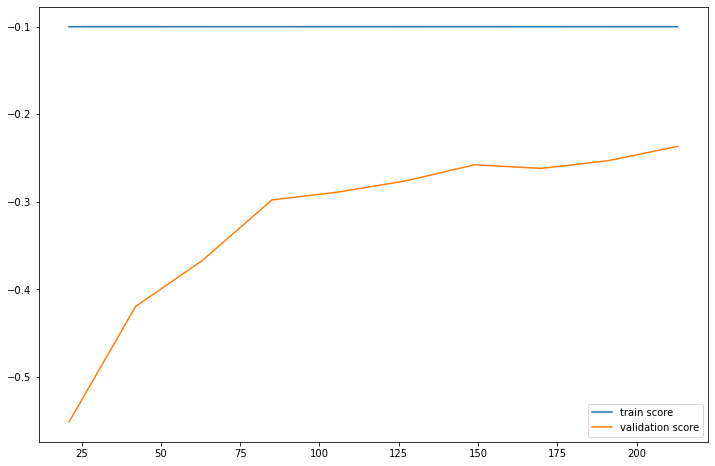

In [63]:
evaluation_bis(svr, 'neg_median_absolute_error')

$\to$ Comme on a une courbe d'entrainement presque constante, il est raisonnable de penser que le modèle est en overfitting, c'est-à-dire qu'il prévoit trop bien les données sur le jeu d'entrainement.

explained variance :  0.35666211541676773
R2 : 0.3360831503940125


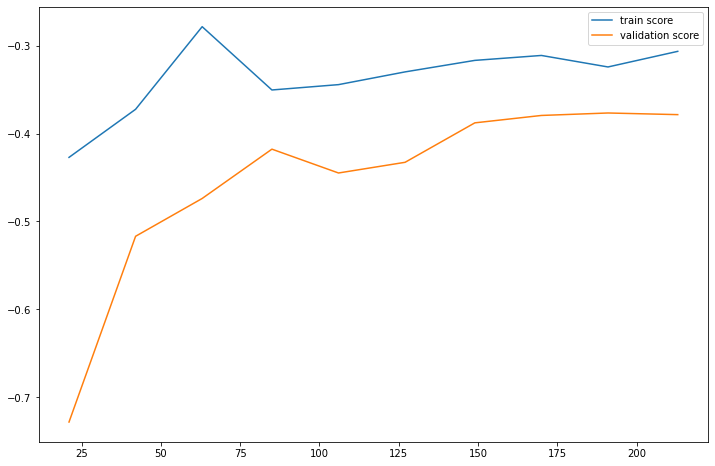

In [64]:
evaluation_bis(knn, 'neg_median_absolute_error')

**Justification du choix du modèle :** On peut imaginer qu'en prenant en compte les mois dans les données, on se rapproche de la notion de voisins : on aura des prix potentiellement similaires sur les même mois. Là encore, on ne constate pas d'overfitting. Le score est similaire à ce que l'on avait pu observer sur les autres modèles. On peut encore fairre tourner un GridSearchCV pour avoir un aperçu du meilleur jeu de paramètres pour ce modèle.

In [65]:
pars = {'n_neighbors' : np.arange(1,11),
        'weights' : ['uniform', 'distance'],
        'algorithm': ['ball_tree', 'kd_tree', 'brute'],
        'leaf_size': np.arange(20,41),
        'metric': ['euclidean', 'manhattan']}


grid = GridSearchCV(knn, pars, cv = 4, scoring = 'neg_median_absolute_error')
grid.fit(X_train_bis, Y_train_bis)
grid.best_params_

{'algorithm': 'brute',
 'leaf_size': 20,
 'metric': 'manhattan',
 'n_neighbors': 10,
 'weights': 'uniform'}

In [66]:
grid.best_score_

-0.32803738317757003

$\to$ On voit que l'erreur peine à descendre en dessous de 30%, ce qui peut signifier que la taille du dataset est un vrai frein à l'amélioration du score. 

# Dernier essai : fusion des deux datasets
Cette partie a un but plus expérimental : voir si l'on peut obtenir de bons résultats en sacrifiant le nombre de lignes du dataset au profit d'une description plus préciser (combiner TEMPS et MOIS sur les trajets)

In [67]:
bdd_fin = pd.merge(bdd_corr_1, bdd_corr_21, left_on =[bdd_corr_1['Gare de départ'],bdd_corr_1['Gare d arrivée'], bdd_corr_1['Prix']],
                   right_on = [bdd_corr_21['Gare de départ'],bdd_corr_21['Gare d arrivée'], bdd_corr_21['Prix']], how ='inner')

In [68]:
bdd_fin.head()

,key_0,key_1,key_2,Prix_x,Temps,Gare de départ_x,Gare d arrivée_x,Distance du trajet_x,Prix moyen_x,Prix_y,Mois,Gare de départ_y,Gare d arrivée_y,Distance du trajet_y,Prix moyen_y
0,Paris,Rennes,133,133,2,Paris,Rennes,329.462708,193.0,133,nov,Paris,Rennes,329.462708,193.0
1,Paris,Rennes,139,139,4,Paris,Rennes,329.462708,193.0,139,déc,Paris,Rennes,329.462708,193.0
2,Paris,Rennes,134,134,7,Paris,Rennes,329.462708,193.0,134,avr,Paris,Rennes,329.462708,193.0
3,Marseille,Rennes,149,149,4,Marseille,Rennes,773.008188,322.0,149,juil,Marseille,Rennes,773.008188,322.0
4,Lyon,Rennes,130,130,2,Lyon,Rennes,560.838254,251.0,130,oct,Lyon,Rennes,560.838254,251.0


In [69]:
bdd_fin = bdd_fin.drop(['key_0', 'key_1', 'key_2', 'Prix_x','Prix moyen_x', 'Gare de départ_x', 'Gare d arrivée_x', 'Distance du trajet_x'], axis = 1)
bdd_fin.columns = ['Temps', 'Prix','Mois', 'Gare de départ', 'Gare d arrivée', 'Distance du trajet', 'Prix moyen']

In [70]:
bdd_fin.head()

,Temps,Prix,Mois,Gare de départ,Gare d arrivée,Distance du trajet,Prix moyen
0,2,133,nov,Paris,Rennes,329.462708,193.0
1,4,139,déc,Paris,Rennes,329.462708,193.0
2,7,134,avr,Paris,Rennes,329.462708,193.0
3,4,149,juil,Marseille,Rennes,773.008188,322.0
4,2,130,oct,Lyon,Rennes,560.838254,251.0


$\to$ On passe dans le même processus que pour les autres datasets

In [71]:
bdd_fin.Prix = bdd_fin.Prix.astype('float')
bdd_fin.Temps = bdd_fin.Temps.astype('float')

In [72]:
# Normalisation des variables flottantes
for flo in bdd_fin.select_dtypes('float'):
    bdd_fin[flo] = rob.fit_transform(np.array(bdd_fin[flo]).reshape(-1,1))

In [73]:
bdd_fin.head()

,Temps,Prix,Mois,Gare de départ,Gare d arrivée,Distance du trajet,Prix moyen
0,-0.705882,-0.264706,nov,Paris,Rennes,-0.641347,-0.890625
1,-0.235294,-0.088235,déc,Paris,Rennes,-0.641347,-0.890625
2,0.470588,-0.235294,avr,Paris,Rennes,-0.641347,-0.890625
3,-0.235294,0.205882,juil,Marseille,Rennes,1.065461,1.125000
4,-0.705882,-0.352941,oct,Lyon,Rennes,0.249010,0.015625


In [74]:
#Encodage des valeurs catégorielles


arr = ohe.fit_transform(np.array(bdd_fin['Gare de départ']).reshape(-1,1))
names = ohe.categories_
names = [x + '_d'for x in names[0]] #on identifie les variables des villes avec un _départ pour les départs
arr2 = pd.DataFrame(arr, columns = names)
temp = bdd_fin.drop('Gare de départ', axis = 1)
bdd_fin = pd.concat([temp, arr2], axis = 1)


arr = ohe.fit_transform(np.array(bdd_fin['Gare d arrivée']).reshape(-1,1))
names = ohe.categories_
names = [x + '_a'for x in names[0]]  #on identifie les variables des villes avec un _arrivée pour les départs
arr2 = pd.DataFrame(arr, columns = names)
temp = bdd_fin.drop('Gare d arrivée', axis = 1)
bdd_fin = pd.concat([temp, arr2], axis = 1)

arr = ohe.fit_transform(np.array(bdd_fin['Mois']).reshape(-1,1))
names = ohe.categories_
names = [x for x in names[0]]
arr2 = pd.DataFrame(arr, columns = names)
temp = bdd_fin.drop('Mois', axis = 1)
bdd_fin = pd.concat([temp, arr2], axis = 1)


In [75]:
bdd_fin.head()

,Temps,Prix,Distance du trajet,Prix moyen,Bordeaux_d,Lyon_d,Marseille_d,Nantes_d,Nice_d,Paris_d,...,déc,fév,jan,juil,juin,mai,mar,nov,oct,sep
0,-0.705882,-0.264706,-0.641347,-0.890625,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,-0.235294,-0.088235,-0.641347,-0.890625,0.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.470588,-0.235294,-0.641347,-0.890625,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,-0.235294,0.205882,1.065461,1.125000,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,-0.705882,-0.352941,0.249010,0.015625,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [76]:
train_df3, test_df3= train_test_split(bdd_fin, test_size = 0.2, random_state = 0)

In [77]:
X_train_fin = train_df3.drop('Prix', axis = 1) #ce sur quoi le modèle apprend
Y_train_fin = train_df3['Prix'] #L'objectif, la variable à prédire

X_test_fin = test_df3.drop('Prix', axis = 1)
Y_test_fin = test_df3['Prix']

In [78]:
def evaluation_fin(model, scor):
    model.fit(X_train_fin, Y_train_fin)
    y_pred_fin = model.predict(X_test_fin)
    
    print('explained variance : ', explained_variance_score(Y_test_fin, y_pred_fin))
    print('R2 :',r2_score(Y_test_fin, y_pred_fin))
    
    N, train_score, val_score = learning_curve(model, X_train_fin, Y_train_fin, cv = 4, scoring = scor, train_sizes = np.linspace(0.1,1,10))
    plt.figure(figsize = (12,8))
    plt.plot(N, train_score.mean(axis = 1), label = 'train score')
    plt.plot(N, val_score.mean(axis = 1), label = 'validation score')
    plt.legend()
    plt.show()

explained variance :  0.17616480257059852
R2 : 0.1759176296113203


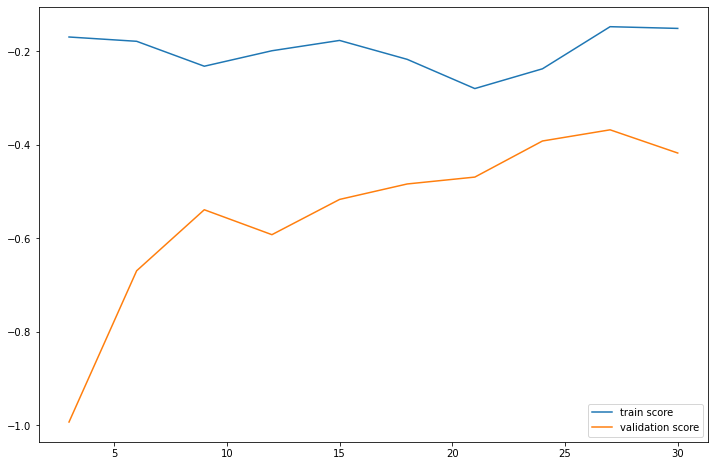

In [79]:
knn = KNeighborsRegressor(n_neighbors = 2)
evaluation_fin(knn, 'neg_median_absolute_error')

In [80]:
pars = {'n_neighbors' : np.arange(1,3),
        'weights' : ['uniform', 'distance'],
        'algorithm': ['ball_tree', 'kd_tree', 'brute'],
        'leaf_size': np.arange(20,41),
        'metric': ['euclidean', 'manhattan']}


grid = GridSearchCV(knn, pars, cv = 4, scoring = 'neg_median_absolute_error')
grid.fit(X_train_fin, Y_train_fin)
grid.best_params_

{'algorithm': 'ball_tree',
 'leaf_size': 20,
 'metric': 'euclidean',
 'n_neighbors': 1,
 'weights': 'uniform'}

In [81]:
grid.best_score_

-0.23529411764705882

$\to$ On a réussi à diminuer l'erreur d'envison 30% de l'erreur obtenue avec les autres datasets. Cependant, on a un $R^2$ beaucoup plus faible, ce qui signifie qu'on a moins expliqué les données. **Fusionner les tables n'est donc pas forcément une meilleure approche que nos études séparées au préalable**